## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal, mannwhitneyu
import json
from typing import Dict, List

In [2]:
# Set style for consistent plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Load results data
results_df = pd.read_csv('/home/benwallner7/route_construction_optimisation/method_analysis/route_opt_results.csv')

## Number of instances

    - 5 methods and 100 instances therefore 500 overall

In [8]:
len(results_df)

500

## Number of valid solutions per method

    - Simulated annealing has a large proportion of invalid solutions.

In [10]:
print(len(results_df.loc[(results_df['valid']==1)&(results_df['method']=='greedy')]))
print(len(results_df.loc[(results_df['valid']==1)&(results_df['method']=='beam')]))
print(len(results_df.loc[(results_df['valid']==1)&(results_df['method']=='annealing')]))
print(len(results_df.loc[(results_df['valid']==1)&(results_df['method']=='local')]))
print(len(results_df.loc[(results_df['valid']==1)&(results_df['method']=='hybrid')]))

100
100
12
100
100


## Approach Overview
- Description of your algorithmic strategy and reasoning, including all approaches considered

Tested various heuristic methods for this route optimisation problem, these 5 methods will be discussed in more detail below.

Implemented the **constraints** set out by the task, checked with `is_valid` function, to start at one of the start points provided `sp = [tuple(pt) for pt in data['start_points']]`, end at one of the specified end points `ep = [tuple(pt) for pt in data['end_points']]`, and tried to maximise the number of goal points for each instance visited `gp = [tuple(pt) for pt in data['goal_points']]`. 

Checked for intersecting paths with `segments_intersect` and `has_self_intersection` functions.

Checked the overall path length constraint by calculating each path segment contribution with: `path_length` and `euclidean` functions.

## Solving Methods

Greedy: A nearest-neighbor greedy heuristic that starts from a chosen start point and repeatedly visits the closest unvisited goal, subject to length and point constraints. This simple heuristic adds the nearest goal if it does not prevent reaching any end point within the total length limit.

```plaintext
Solution Summary:
Total goals: 271
 Instances: 100
 Avg goals/instance: 2.71
 Total wall time: 0.23s
 Avg per-instance time: 0.002s
```

Beam Search: A limited-width search that keeps only the top W partial paths at each step. At each extension step, we expand all current beams by adding one more goal and then prune to the best W candidates, balancing exploration and efficiency (geeksforgeeks.org).

```plaintext
Solution Summary:
 Total goals: 664
 Instances: 100
 Avg goals/instance: 6.64
 Total wall time: 1.99s
 Avg per-instance time: 0.129s
```

Simulated Annealing: A stochastic optimization that starts from an initial solution (we use greedy) and makes random local modifications (e.g. 2-opt swaps or adding a goal). Worse solutions can be accepted with a probability that decreases as a “temperature” cools, allowing escape from local optima. We iteratively update the path to maximize goal count (primary) and minimize length (secondary), following standard simulated annealing techniques (geeksforgeeks.org).

```plaintext
Solution Summary:
 Total goals: 233
 Instances: 100
 Avg goals/instance: 2.33
 Total wall time: 3.42s
 Avg per-instance time: 0.246s
```

Local Search (2-Opt): Starting from a greedy solution, we apply the 2-opt swap repeatedly: this cuts two edges and reconnects in the alternate way to reduce total length. The 2-opt algorithm iterates until no further improvement is found, refining the path by removing crossing or long segments (slowandsteadybrain.medium.com).

```plaintext
Solution Summary:
 Total goals: 262
 Instances: 100
 Avg goals/instance: 2.62
 Total wall time: 0.10s
 Avg per-instance time: 0.001s
```

Hybrid: A combination of greedy followed by local 2-opt. We first run the greedy heuristic, then apply the 2-opt improvement on that path. This hybrid approach leverages greedy construction and local refinement.

```plaintext
Solution Summary:
 Total goals: 98
 Instances: 100
 Avg goals/instance: 0.98
 Total wall time: 3.33s
 Avg per-instance time: 0.241s
```

## Implementation Details
- Key components of your solution

### 2-opt is a classic local search technique:

    2-opt removes two edges from the path and reconnects the two path segments in the opposite order.

    This effectively reverses the order of the nodes between those two edges.

    If the new route is shorter (and still valid under constraints), we accept it.

    The process is repeated until no further improvement is found.


### Improvements with 3-opt implementation

To optimise the solution to increase the number of goal points visited I adapted the original functions to use the 3-opt search technique.

A 3-opt move involves removing three edges and reconnecting the segments in a different way to reduce the total path length. The algorithm iteratively applies 3-opt moves that result in shorter paths until no further improvements can be made.

When selecting the next point in the route the algorithms look to find the point with the shortest path length as this was found to be a key issue in violating the constraints.

## Performance Analysis
- Runtime analysis across different instance types and sizes

Tuning parameters for the different approaches

## Beam approach

Beam width: started at standard value 5, increasing this improves the number of global points reached, this also increases the computation time.

alpha: not much change going from 0.001 to 0.1

## Results Summary
- Final performance metrics and insights gained

## Visualizations
- Any relevant graphs or charts that illustrate your findings

In [16]:
results_df.head()

,instance,method,goals_visited,path_length,num_points,runtime,valid
0,instance_003,greedy,3,1972.511,5,0.0001,1
1,instance_001,greedy,3,1847.035,5,0.0002,1
2,instance_002,greedy,3,1759.288,5,0.0002,1
3,instance_004,hybrid,0,554.658,2,0.0001,1
4,instance_003,local,3,1972.511,5,0.0001,1


In [12]:
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

([0, 1, 2, 3, 4],
 [Text(0, 0, 'greedy'),
  Text(1, 0, 'hybrid'),
  Text(2, 0, 'local'),
  Text(3, 0, 'beam'),
  Text(4, 0, 'annealing')])

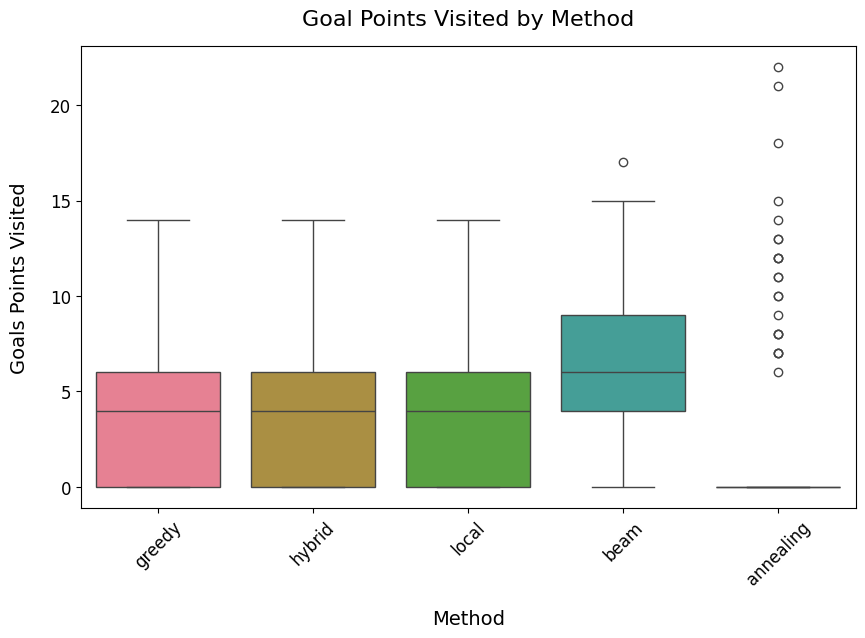

In [14]:
# Goals visited comparison (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='method', y='goals_visited', hue='method')
plt.title('Goal Points Visited by Method', pad = 15)
plt.xlabel('Method', labelpad = 15)
plt.ylabel('Goals Points Visited', labelpad = 15)
plt.xticks(rotation=45)

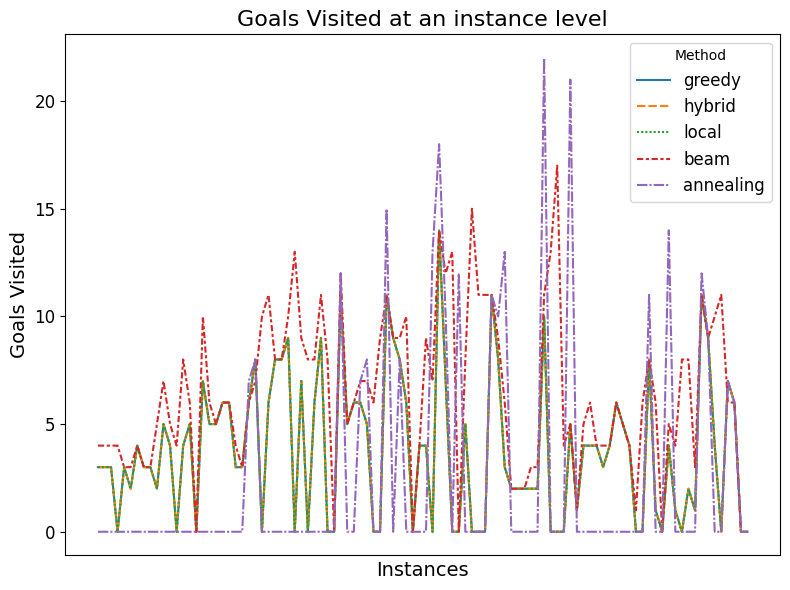

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(
    data=results_df,
    x='instance',
    y='goals_visited',
    hue='method',
    style='method',
    palette='tab10',
)
plt.xlabel('Instance')
plt.ylabel('Goals Visited')
plt.title('Goals Visited at an instance level')
plt.legend(title='Method')
plt.xticks([])
plt.tight_layout()
plt.show()

## Runtime analysis across different instance types and sizes

    - Consider the number of start points, end points and goal points for each instance.

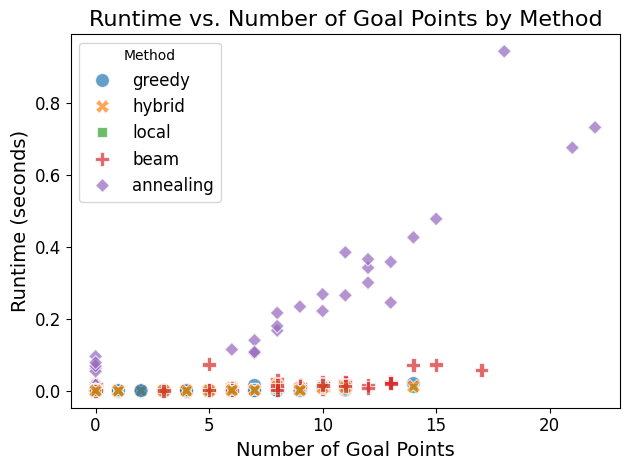

In [23]:
sns.scatterplot(
    data=results_df,
    x='goals_visited',
    y='runtime',
    hue='method',
    palette='tab10',
    style='method',
    s=100,
    alpha=0.7
)

# Set plot labels and title
plt.xlabel('Number of Goal Points')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Number of Goal Points by Method')

# Display the legend
plt.legend(title='Method')

# Show the plot
plt.tight_layout()
plt.show()